In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import choices
%matplotlib inline

In [25]:
plt.style.use("seaborn-dark")

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
# ax.grid(color='#2A3459')  # bluish dark grey, but slightly lighter than background

In [4]:
path = '/home/mcalmeida/ds_lab/marketing_kaggle/archive/train.ft'
df = pd.read_feather(path)
df.head()

,row_id,time_id,investment_id,target,f_0,f_1,f_2,f_3,f_4,f_5,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,0_1,0,1,-0.300781,0.932617,0.113708,-0.402100,0.378418,-0.203979,-0.413574,...,0.365967,-1.095703,0.200073,0.819336,0.941406,-0.086792,-1.086914,-1.044922,-0.287598,0.321533
1,0_2,0,2,-0.231079,0.811035,-0.514160,0.742188,-0.616699,-0.194214,1.771484,...,-0.154175,0.912598,-0.734375,0.819336,0.941406,-0.387695,-1.086914,-0.929688,-0.974121,-0.343506
2,0_6,0,6,0.568848,0.394043,0.615723,0.567871,-0.607910,0.068909,-1.083008,...,-0.138062,0.912598,-0.551758,-1.220703,-1.060547,-0.219116,-1.086914,-0.612305,-0.113953,0.243652
3,0_7,0,7,-1.064453,-2.343750,-0.011871,1.875000,-0.606445,-0.586914,-0.815918,...,0.382080,0.912598,-0.266357,-1.220703,0.941406,-0.608887,0.104919,-0.783203,1.151367,-0.773438
4,0_8,0,8,-0.531738,0.842285,-0.262939,2.330078,-0.583496,-0.618164,-0.742676,...,-0.170410,0.912598,-0.741211,-1.220703,0.941406,-0.588379,0.104919,0.753418,1.345703,-0.737793


In [15]:
df['investment_id'].value_counts()

2140    1211
2385    1209
1062    1209
1144    1209
2727    1209
        ... 
905        8
2558       8
3662       7
2800       3
1415       2
Name: investment_id, Length: 3579, dtype: int64

In [21]:
print(f"Número de investment_id's únicos: {len(df['investment_id'].unique())}")

Número de investment_id's únicos: 3579


In [23]:
choices(range(300), k=20)

[148,
 227,
 73,
 290,
 206,
 45,
 52,
 50,
 110,
 176,
 165,
 296,
 58,
 203,
 276,
 27,
 38,
 195,
 295,
 59]

In [24]:
df[df.investment_id == 0].head()

,row_id,time_id,investment_id,target,f_0,f_1,f_2,f_3,f_4,f_5,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
1711316,757_0,757,0,0.066650,1.188477,4.222656,0.0,7.042969,1.006836,-0.106689,...,-2.039062,0.449219,-1.305664,0.102112,0.860352,9.242188,1.120117,1.128906,0.0,-0.733398
1714085,758_0,758,0,2.789062,1.124023,4.152344,0.0,6.617188,0.981445,-1.685547,...,-1.807617,0.583008,-0.896484,0.115417,0.916504,4.292969,1.236328,0.424072,0.0,-0.736816
1716869,759_0,759,0,-3.843750,1.112305,3.845703,0.0,6.281250,0.948242,-1.815430,...,-0.985352,1.044922,0.213013,0.198608,-1.068359,1.208008,-0.911133,0.169067,0.0,-0.729980
1719651,760_0,760,0,-3.304688,1.138672,3.548828,0.0,6.269531,1.047852,-2.125000,...,-1.522461,0.728027,3.173828,0.149902,0.657715,1.237305,0.026169,0.678223,0.0,-0.707031
1722426,761_0,761,0,-3.441406,0.988281,2.753906,0.0,5.847656,0.918945,-2.144531,...,0.750977,-0.840820,3.080078,0.127319,1.262695,2.195312,-0.100952,-1.098633,0.0,-0.748047


Mean of target -  nan
Minimum value of target -  -9.421875
Maximum value of target -  12.0390625


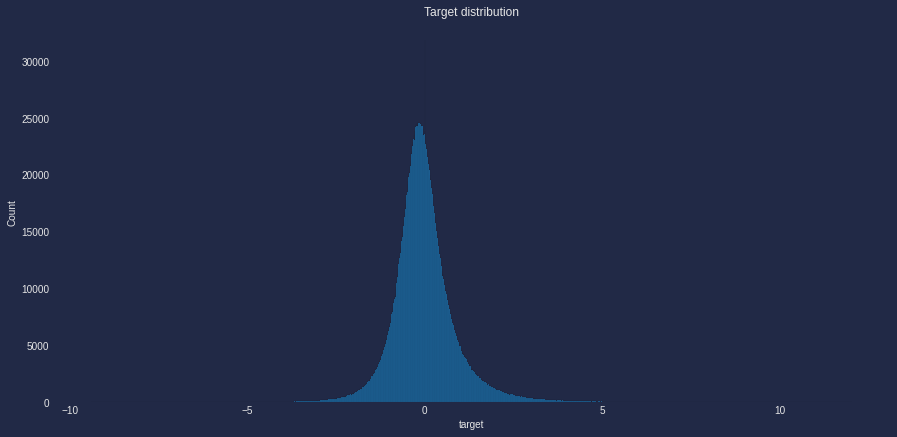

In [26]:
plt.figure(figsize=(15,7))

sns.histplot(df['target'])
plt.title("Target distribution")

print("Mean of target - ", df['target'].describe()['mean'])
print("Minimum value of target - ", df['target'].describe()['min'])
print("Maximum value of target - ", df['target'].describe()['max'])

plt.show()

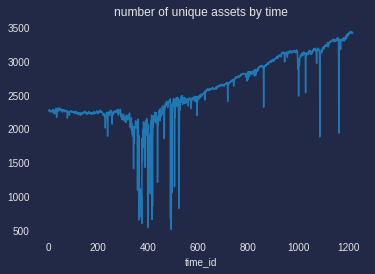

In [27]:
df.groupby('time_id')['investment_id'].nunique().plot()
plt.title("number of unique assets by time")
plt.show()

array([<AxesSubplot:xlabel='time_id'>, <AxesSubplot:xlabel='time_id'>,
       <AxesSubplot:xlabel='time_id'>, <AxesSubplot:xlabel='time_id'>,
       <AxesSubplot:xlabel='time_id'>, <AxesSubplot:xlabel='time_id'>,
       <AxesSubplot:xlabel='time_id'>, <AxesSubplot:xlabel='time_id'>,
       <AxesSubplot:xlabel='time_id'>, <AxesSubplot:xlabel='time_id'>,
       <AxesSubplot:xlabel='time_id'>, <AxesSubplot:xlabel='time_id'>,
       <AxesSubplot:xlabel='time_id'>, <AxesSubplot:xlabel='time_id'>,
       <AxesSubplot:xlabel='time_id'>, <AxesSubplot:xlabel='time_id'>,
       <AxesSubplot:xlabel='time_id'>, <AxesSubplot:xlabel='time_id'>,
       <AxesSubplot:xlabel='time_id'>, <AxesSubplot:xlabel='time_id'>,
       <AxesSubplot:xlabel='time_id'>], dtype=object)

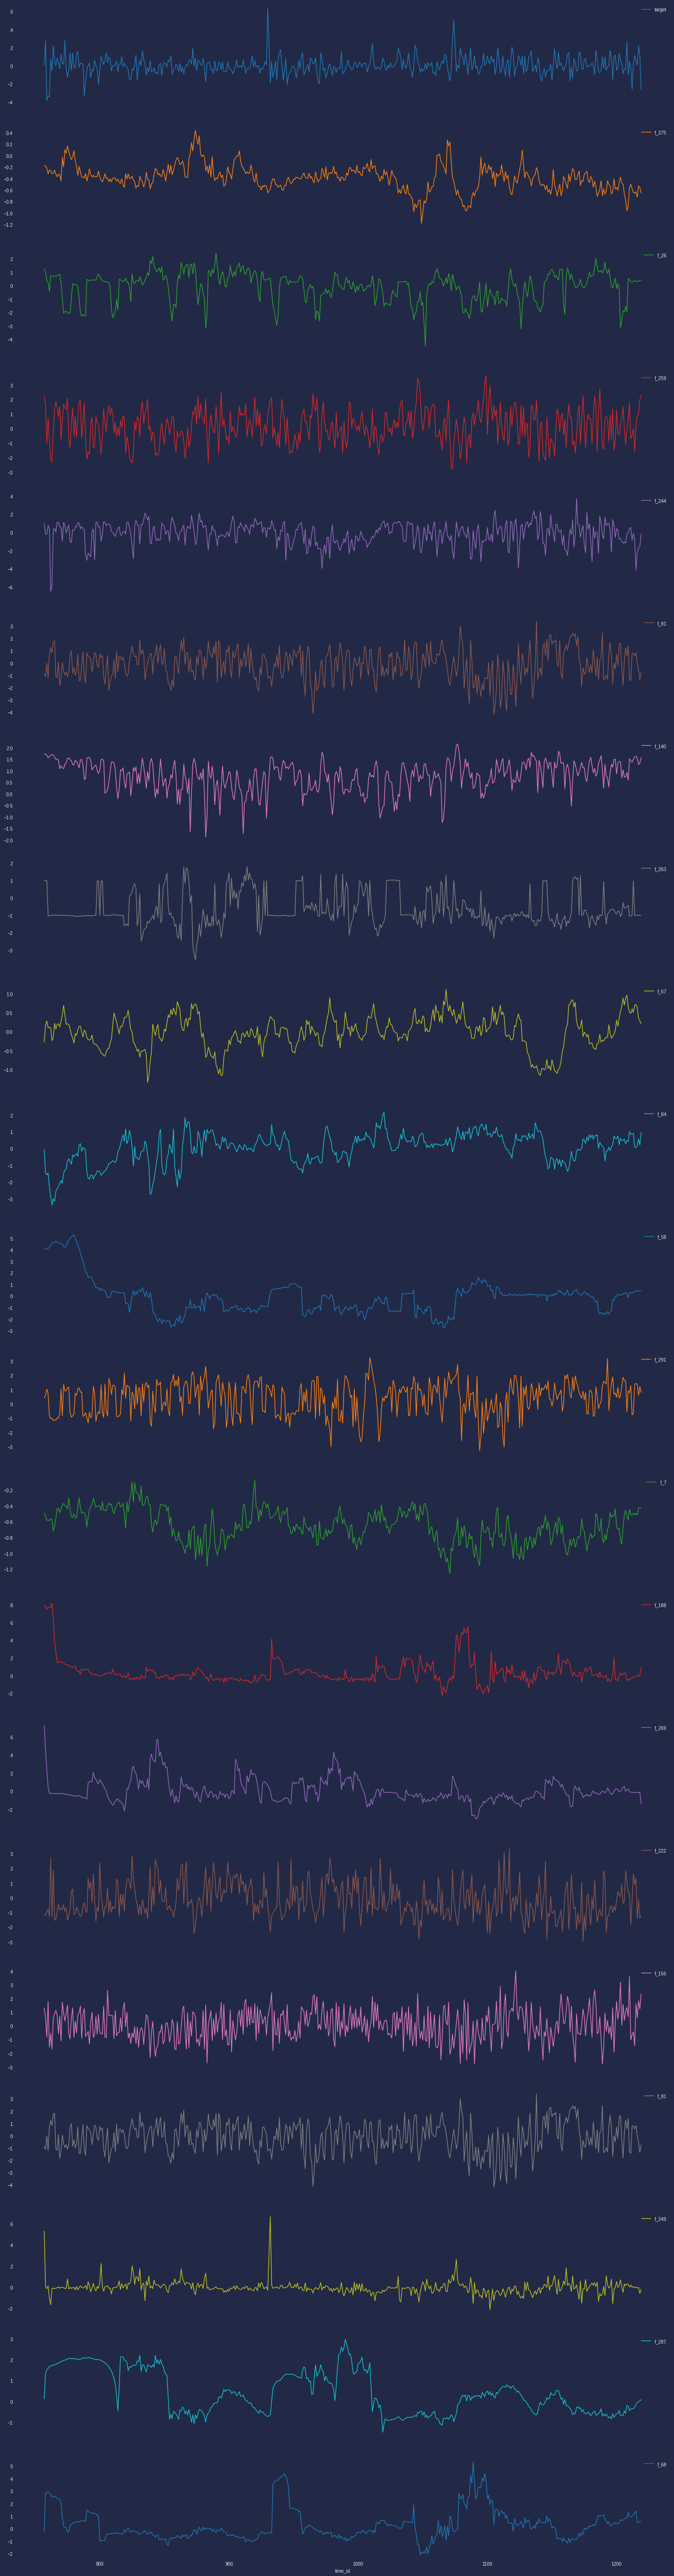

In [31]:
(
    df
    [df.investment_id == 0]
    .plot(x='time_id', y=['target'] + [f'f_{i}' for i in choices(range(300), k=20)], figsize=(25, 100), subplots=True)
)